# Cruise data analysis in Python

## WCOA 2013 data set

To download the data used in this tutorial, use the following command in the Terminal (Mac) or Git Bash (Windows).

```
git clone https://github.com/mlmldata/wcoa_cruise.git
```

The data comes from the West Coast Ocean Acidification (WCOA) cruise in 2013. The goal of this NOAA-supported research cruise is to collect data to help understand the effects of coastal upwelling on ocean acidification, and the impacts of ocean acidification on organisms and ecosystems. [This video](https://www.youtube.com/watch?v=Eesi6e03Yx0&t=134s) gives an idea of life aboard the ship and the type of science operations conducted.

In this part of the tutorial, we will go over the basics of working with dates in Pandas and Numpy, make some exploratory plots and start a regression analysis. The data exploration will be largely guided by student interest.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

### Introduction to Pandas dataframes

We use Pandas to import the csv data file. 

Here, there is an optional `parse_dates` argument. The numbers in double brackets `[[8,9]]` indicate which columns to interpret as dates.

In [2]:
filename = 'data/wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

/var/folders/z7/lmyk7sz94177j166ck0x63h80000gr/T/ipykernel_8458/3121988433.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename,header=31,na_values=-999,


In [3]:
df.head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2370.2,2,2369.0,2,7.294,2,25.0,NaN,9,NaN
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,NaN,9,NaN,9,7.295,2,25.0,NaN,9,NaN
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2349.6,2,2343.7,2,7.282,2,25.0,43.521,3,NaN
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2318.7,2,2311.9,2,7.287,2,25.0,45.641,2,NaN
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.2,...,2300.0,2,2299.7,2,7.308,2,25.0,47.741,2,NaN


In [4]:
df.columns

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO',
       'BTLNBR', 'BTLNBR_FLAG_W', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'CTDPRS',
       'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W', 'SILCAT',
       'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT', 'NITRIT_FLAG_W',
       'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT', 'PH_TOT_FLAG_W',
       'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA'],
      dtype='object')

Instead of strings, the dates are now in a special `datetime64` format. This means that, instead of treating the dates in the same way as any other collection of characters, pandas and NumPy can understand how this variable represents time.

In [5]:
df['DATE_TIME'].head()

0   2013-08-05 02:12:20
1   2013-08-05 02:12:53
2   2013-08-05 02:19:58
3   2013-08-05 02:27:01
4   2013-08-05 02:30:53
Name: DATE_TIME, dtype: datetime64[ns]

For example, subtracting `datetime64` objects with pandas gives a `Timedelta` object, which is specifically used to represent differences between times. The first two samples in the cruise data are separated by 33 seconds (the time between firing of bottles).

In [6]:
df['DATE_TIME'][1]-df['DATE_TIME'][0]

Timedelta('0 days 00:00:33')

In [7]:
pd.unique(df['LATITUDE'])

array([48.2 , 48.3 , 48.37, 48.44, 48.5 , 48.53, 48.61, 48.66, 48.71,
       48.78, 48.81, 48.84, 47.97, 48.14, 47.96, 47.68, 47.13, 47.11,
       47.12, 47.34, 46.13, 46.17, 46.19, 46.25, 46.24, 46.12, 44.65,
       44.66, 44.2 , 41.99, 41.97, 41.96, 41.94, 41.9 , 40.25, 40.23,
       40.22, 40.21, 40.1 , 37.67, 37.94, 37.91, 37.87, 37.76, 37.75,
       36.8 , 36.78, 36.76, 36.73, 36.71, 36.69, 36.52, 36.7 ])

#### Exercise

Create a list of unique station ID’s (“STNNBR”) found in the survey data. Call it `stns`. How many unique stations are there in the data? 




### Summary statistics

A summary of the dataframe is given by the `.describe()` method.

In [8]:
df['CTDTMP'].describe()

count    969.000000
mean       8.993954
std        3.055917
min        1.738200
25%        7.292000
50%        8.328200
75%       10.752200
max       20.747400
Name: CTDTMP, dtype: float64

These summary statistics can also be accessed individually with similar syntax.

In [9]:
df['CTDTMP'].mean()

8.993954179566563

In [10]:
df['CTDTMP'].min()

1.7382

Alternate method using Numpy functions.

In [11]:
np.min(df['CTDTMP'])

1.7382

### Mathematical operations

Converting Celcius to Fahrenheit

In [12]:
df['CTDTMP_F'] = 9/5*df['CTDTMP'] + 32 

In [13]:
df['CTDTMP_F'].head()

0    38.63894
1    38.64236
2    39.85916
3    41.05328
4    41.82404
Name: CTDTMP_F, dtype: float64

In [14]:
df['CTDTMP'].head()

0    3.6883
1    3.6902
2    4.3662
3    5.0296
4    5.4578
Name: CTDTMP, dtype: float64

### Plotting

Plot latitude as a function of time.

(array([15922., 15926., 15930., 15934., 15938., 15942., 15946.]),
 [Text(15922.0, 0, '2013-08-05'),
  Text(15926.0, 0, '2013-08-09'),
  Text(15930.0, 0, '2013-08-13'),
  Text(15934.0, 0, '2013-08-17'),
  Text(15938.0, 0, '2013-08-21'),
  Text(15942.0, 0, '2013-08-25'),
  Text(15946.0, 0, '2013-08-29')])

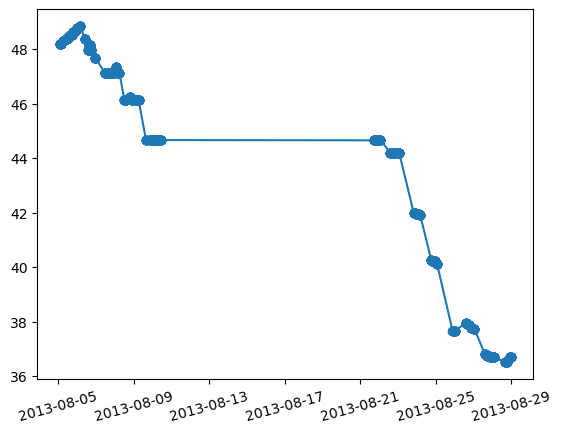

In [15]:
plt.figure()
plt.plot(df['DATE_TIME'],df['LATITUDE'],'-o')
plt.xticks(rotation=15)

The `pyplot` library automatically understands `datetime64` objects so it is easy to see how the ship moved between stations from north to south as weeks passed.

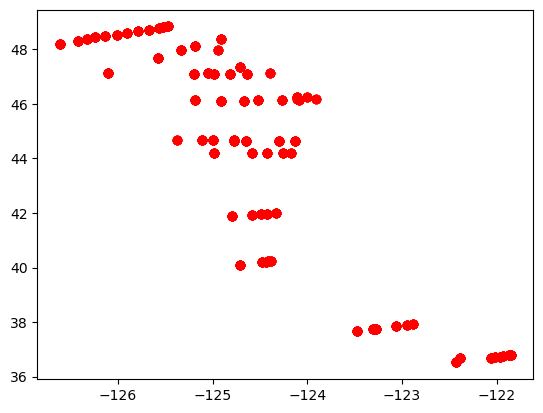

In [16]:
plt.figure()
plt.plot(df['LONGITUDE'], df['LATITUDE'], 'ro')

The `scatter()` function allows points to be colored according to the value of a variable. In the case of dates, later dates are shown as warmer colors.

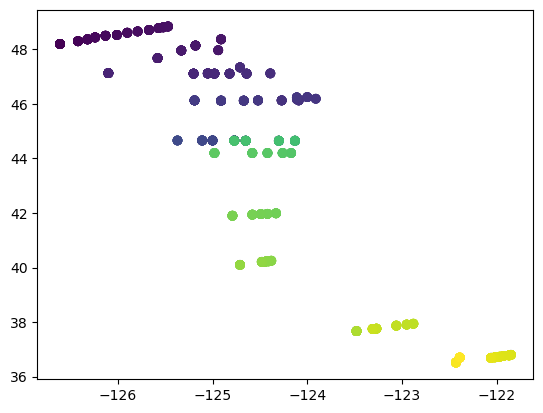

In [17]:
plt.figure()
plt.scatter(df['LONGITUDE'],df['LATITUDE'],c=df['DATE_TIME'])

Note that the vertical coordinate is pressure (not depth, which indicates the bottom depth rather than the depth of the sample). To plot dissolved oxygen with depth:

Text(0, 0.5, 'pressure[dbar]')

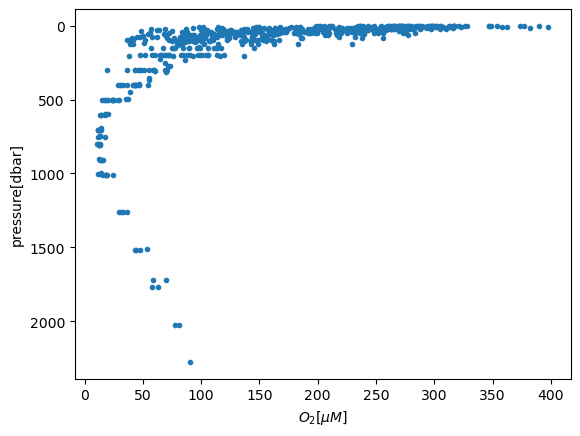

In [18]:
plt.figure()
plt.plot(df['OXYGEN'],df['CTDPRS'],'.')
plt.gca().invert_yaxis()

plt.xlabel('$O_2 [\mu M]$')
plt.ylabel('pressure[dbar]')

<Axes: >

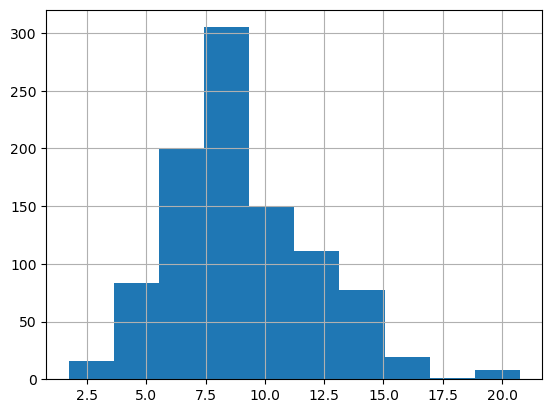

In [19]:
plt.figure()
df['CTDTMP'].hist()

<Axes: >

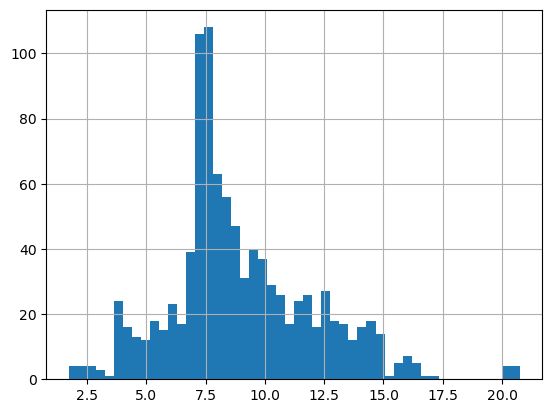

In [20]:
plt.figure()
df['CTDTMP'].hist(bins=50)

In [21]:
df.keys()

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO',
       'BTLNBR', 'BTLNBR_FLAG_W', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'CTDPRS',
       'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W', 'SILCAT',
       'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT', 'NITRIT_FLAG_W',
       'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT', 'PH_TOT_FLAG_W',
       'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA', 'CTDTMP_F'],
      dtype='object')

#### Exercises

* What scientific questions can be addressed with this data set?
* What relationships might occur between different variables?
* What differences might occur within the same variables, but at different locations or times?
* Create exploratory plots (one PDF, one scatter plot)

## Slicing and subsetting data

In [22]:
df[0:3]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916


In [23]:
df.iloc[0:3]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916


In [24]:
df.loc[0:3]

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2,2311.9,2,7.287,2,25.0,45.641,2,NaN,41.05328


In [25]:
df.loc[0:3,['CTDTMP','CTDPRS']]

,CTDTMP,CTDPRS
0,3.6883,999.5
1,3.6902,1000.8
2,4.3662,749.0
3,5.0296,503.9


#### Exercise

What do you expect to happen when you execute:
```
df[0:1]
df[:4]
df[:-1]
```

What do you expect to happen when you call:
```
df.iloc[0:4, 1:4]
df.loc[0:4, 1:4]
```

How are the two commands different?

Adapted from: https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html

### Subsetting Data using Criteria

In [26]:
df[df.LATITUDE > 40].head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2,2369.0,2,7.294,2,25.0,NaN,9,NaN,38.63894
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,9,NaN,9,7.295,2,25.0,NaN,9,NaN,38.64236
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2,2343.7,2,7.282,2,25.0,43.521,3,NaN,39.85916
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2,2311.9,2,7.287,2,25.0,45.641,2,NaN,41.05328
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.2,...,2,2299.7,2,7.308,2,25.0,47.741,2,NaN,41.82404


In [27]:
df[df.LATITUDE <= 40].head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
770,2013-08-25 21:23:35,32P020130821,WCOA2013,2,10,133,1,1,2,37.67,...,6,2430.4,6,7.493,2,25.0,73.346,2,NaN,35.12876
771,2013-08-25 21:32:13,32P020130821,WCOA2013,2,10,133,1,2,2,37.67,...,2,2427.6,2,7.467,2,25.0,69.812,2,NaN,35.30336
772,2013-08-25 21:40:44,32P020130821,WCOA2013,2,10,133,1,3,2,37.67,...,2,2424.3,2,7.442,2,25.0,65.502,2,NaN,35.55914
773,2013-08-25 21:49:45,32P020130821,WCOA2013,2,10,133,1,4,2,37.67,...,2,2413.7,2,7.400,2,25.0,60.170,2,NaN,36.10526
774,2013-08-25 21:57:55,32P020130821,WCOA2013,2,10,133,1,5,2,37.67,...,2,2401.4,2,7.374,2,25.0,57.739,2,NaN,36.92894


In [28]:
dfsub = df[(df.CTDPRS <= 10) & (df.LATITUDE > 40)]

In [29]:
dfsub.head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA,CTDTMP_F
18,2013-08-05 03:00:52,317W20130803,WCOA2013,1,2,11,1,19,4,48.20,...,9,NaN,9,NaN,9,NaN,NaN,9,NaN,56.54660
19,2013-08-05 03:01:10,317W20130803,WCOA2013,1,2,11,1,20,2,48.20,...,2,2189.1,6,7.983,3,25.0,155.043,2,NaN,56.54570
38,2013-08-05 06:37:22,317W20130803,WCOA2013,1,2,12,1,19,2,48.30,...,9,2180.0,6,7.980,3,25.0,152.868,2,NaN,57.72218
39,2013-08-05 06:37:42,317W20130803,WCOA2013,1,2,12,1,20,2,48.30,...,2,NaN,9,7.981,2,25.0,NaN,5,NaN,57.72290
58,2013-08-05 10:41:19,317W20130803,WCOA2013,1,2,13,1,19,2,48.37,...,2,2178.7,2,7.931,2,25.0,142.629,2,NaN,55.69844


### Exercises

* Select a subset of rows in the `df` DataFrame that contains data from a pressure range between 500 and 1000 dbar. How many rows did you end up with? What did your neighbor get?

* You can use the isin command in Python to query a DataFrame based upon a list of values as follows:
```
df[df['STNNBR'].isin([listGoesHere])]
```
Use the `isin` function to find all samples from station numbers 11 and 12.

### Exercises

pH values are contained in the `df['PH_TOT']` DataArray

Quality control flags for pH are contained in the `df['PH_TOT_FLAG_W']` DataArray.

World Ocean Circulation Experiment (WOCE) quality control flags are used: 
* 2 = good value
* 3 = questionable value
* 4 = bad value 
* 5 = value not reported
* 6 = mean of replicate measurements
* 9 = sample not drawn.


1. Create a new DataFrame called `dfsub1` that excludes all bad, questionable and missing pH values. Plot the probability density function for pH.

In [30]:
dfsub = df[(df['CTDPRS'] > 10) & (df['LATITUDE'] > 40)]

2. Create a new DataFrame called `dfsub2` that excludes all bad, questionable and missing pH and CTD oxygen values. Plot oxygen vs. pH.

In [31]:
dfsub2 = df[(df['CTDOXY_FLAG_W'] == 2) & (df['PH_TOT_FLAG_W'] == 2)]

### Fit a linear model in Python

Text(0, 0.5, 'pH$_{Tot}$')

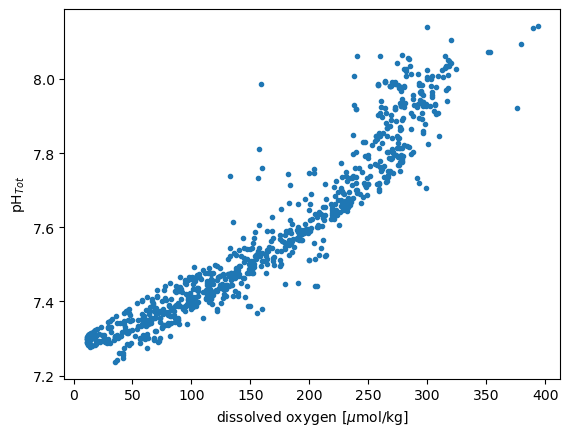

In [32]:
plt.plot(df['CTDOXY'],df['PH_TOT'],'.')
plt.xlabel('dissolved oxygen [$\mu$mol/kg]')
plt.ylabel('pH$_{Tot}$')

In [33]:
result = stats.linregress(dfsub2['CTDOXY'],dfsub2['PH_TOT'])

In [34]:
result

LinregressResult(slope=0.002305076546103237, intercept=7.202036145940105, rvalue=0.9510631019969654, pvalue=0.0, stderr=2.7737424376777354e-05, intercept_stderr=0.004977802641597415)

### Exercise

Plot the linear model with the data.